In [30]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
a=pd.read_csv('HR_comma_sep.csv')
a

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [31]:
a.groupby('left').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [32]:
left=a[a['left']==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [33]:
left.shape

(3571, 10)

In [35]:
b=a[['satisfaction_level','average_montly_hours','promotion_last_5years']]
c=a['left']


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model=LogisticRegression()

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(b,c,test_size=0.25)
model.fit(X_train,Y_train)

LogisticRegression()

In [43]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
acu=model.score(X_test,Y_test)
acu

0.78

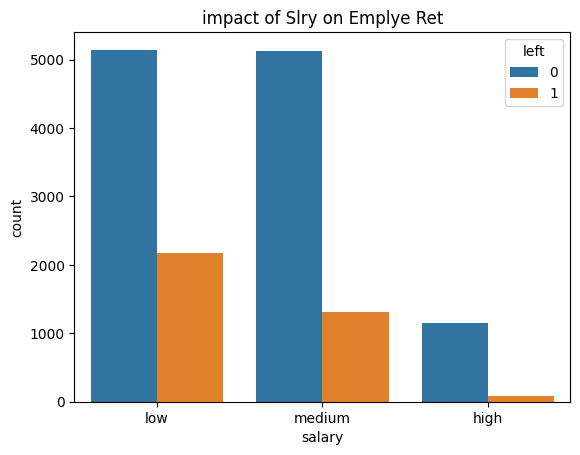

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='salary', hue='left', data=a)
plt.title('impact of Slry on Emplye Ret')
plt.xlabel('salary')
plt.ylabel('count')
plt.show()


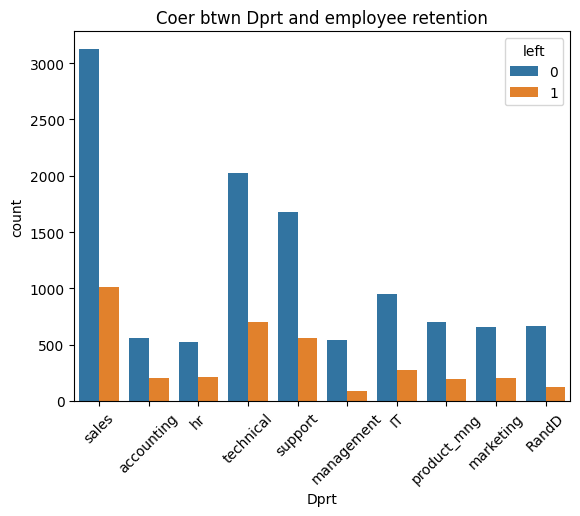

In [47]:
sns.countplot(x='Department', hue='left', data=a)
plt.title('Coer btwn Dprt and employee retention')
plt.xlabel('Dprt')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()